In [1]:
import numpy as np
import pandas as pd
from scipy.constants import h,k,c,Wien,sigma
from astroquery.vizier import Vizier

%matplotlib inline
import matplotlib.pyplot as plt

# change plotting defaults
plt.rc('axes', labelsize=18)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}
plt.rcParams['figure.figsize'] = (14, 10)

In [2]:
def trap_rule_data_defintgral(x, f, a, b): #for definite integral from (a,b) in trapezoidal rule
    #check bounday limits, make an if statement to check endpoints
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x[i+1] - x[i] #for ever index there is a delta x in value
        sum = sum + ((f[i+1]+f[i])/2)*(delta_x) #same as f[i-1] + f[i] 
    return sum

In [3]:
#integral from a to b points in Trapezoid Rule for photons
def trap_rule_data_defintgral_photons(x, f, a, b, h, c): #for definite integral from (a,b) 
    # photon energy of E = hc/lambda
    #NOTE your input for x is in micron and f is per micron. Convert to meters
    e = (h*c)/(x*1e-6) #x converting microns to meters, e is photon energy 
    #check bounday limits, make an if statement to check endpoints
    #when finding the index, the units have to be the same with the x array units
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    #converted to photons
    y = (f/1e-6)/e #converting per micron to per meter then divide by photon energy
    x_m = (x*1e-6) #converting micron to meter
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x_m[i+1] - x_m[i] #for ever index there is a delta x in value
        sum = sum + ((y[i+1] + y[i])/2)*(delta_x) #sum = sum + ((f[i+1]+f[i])/2)*(delta_x) #same as f[i-1] + f[i] 
    return sum

In [4]:
def blackbody_wav(w, T): #w is lambda in meters, T is temperature in Kelvin, these are the inputs
    s = (h*c)/(w*k*T) # define section of equation, e^(...)
    x = (2*h*(c**2))/(w**5) #front portion of equation 
    y = x/(np.exp(s) - 1)#b is B_lambda
    b = y*np.pi #converting intensity to flux, acknowledging steradians
    return np.array([w,b]) #output of array  of (wavelength, B_lambda) as W/m^2 per unit wavelength (meter)

In [5]:
#this is the blackbody function for temperature for 
# c is speed of light in m/s, h in J*Hz^-1, planck's constant or J*s, k is Boltzmann's in J*K^-1
def blackbody_wav_photons(w, T): #w is lambda in meters, T is temperature in Kelvin, these are the inputs
    s = (h*c)/(w*k*T) # define section of equation, e^(...)
    x = (2*h*(c**2))/(w**5) #front portion of equation 
    y = x/(np.exp(s) - 1)#b is B_lambda
    b = y*np.pi #converting intensity to flux, acknowledging steradians
    e = (h*c)/w #photon energy of E = hc/lambda
    j = b/e #output of photons m-2 s-1 per wavelength(m)
    return np.array([w,j]) #output of array  of (wavelength, B_lambda) as photons m-2 s-1 per wavelength(m)

In [6]:
au = 149597870700 #m
R_sol = 6.957e8
R_TRAP1 = 0.1192*R_sol

In [7]:
wave = np.arange(0.01e-6, 5e-6, 1e-11) #endpoint is of the TRAPPIST-1 spectrum at 200 microns (2e-4 m)
#Blackbody of stars
#energy
Sol_flux_energy = blackbody_wav(wave, 5772) #Sun's temperature 5772 K
TRAP1_flux_energy = blackbody_wav(wave, 2566) #TRAPPIST-1's temp 2566 K
#photons
Sol_flux_photons = blackbody_wav_photons(wave, 5772) #Sun's temperature 5772 K
TRAP1_flux_photons = blackbody_wav_photons(wave, 2566) #TRAPPIST-1's temp 2566 K

**Note**: This is the blackbody from the star, we need the solar insolation of the planet. For this we use **inverse square law** $flux = \frac{L}{4 \pi d^{2}}$

In [8]:
h

6.62607015e-34

In [9]:
c

299792458.0

In [10]:
k

1.380649e-23

In [11]:
#Insolation in energy
L_Sol_energy = 4*np.pi*((R_sol)**2)*(Sol_flux_energy[1])
Earth_insol_Gill_spectra_energy = (L_Sol_energy)/(4*np.pi*((au)**2))
L_TRAP1e_energy = 4*np.pi*((R_TRAP1)**2)*(TRAP1_flux_energy[1])
TRAP1_e_insol_Gill_spectra_energy = (L_TRAP1e_energy)/(4*np.pi*((0.02925*(au))**2))

In [12]:
#Insolation in photons
L_Sol_photons = 4*np.pi*((R_sol)**2)*(Sol_flux_photons[1])
Earth_insol_Gill_spectra_photons = (L_Sol_photons)/(4*np.pi*((au)**2))
L_TRAP1e_photons = 4*np.pi*((R_TRAP1)**2)*(TRAP1_flux_photons[1])
TRAP1_e_insol_Gill_spectra_photons = (L_TRAP1e_photons)/(4*np.pi*((0.02925*(au))**2))
TRAP1_e_insol_Gill_spectra_photons #photons m-2 s-1 per wavelength(m)

array([2.07911667e-206, 3.62586557e-206, 6.31627021e-206, ...,
       5.23138433e+026, 5.23135988e+026, 5.23133544e+026])

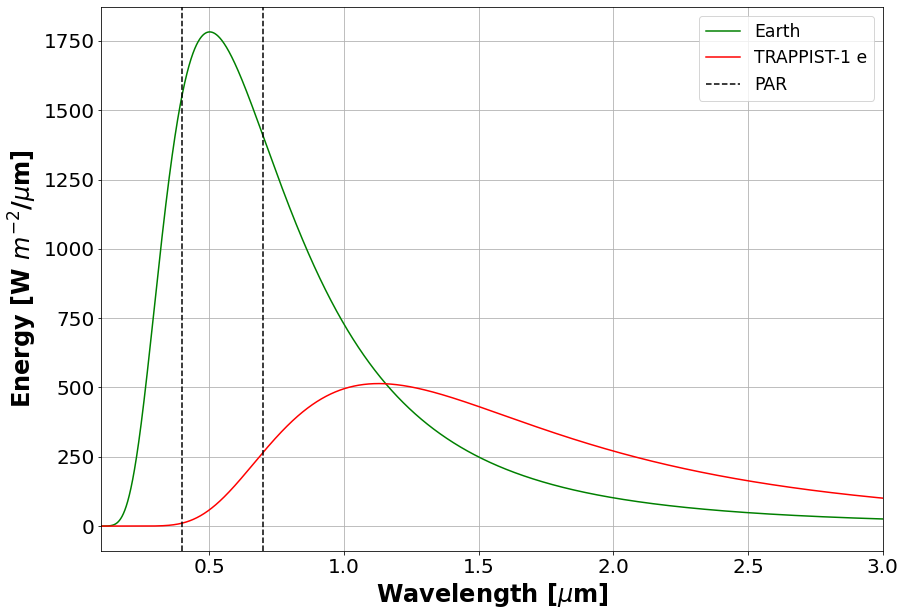

In [14]:
#Energy
plt.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
plt.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
plt.xlabel(r'Wavelength [$\mu$m]', fontsize='24')
plt.ylabel(r'Energy [W $m^{-2}$/$\mu$m]', fontsize='24')
#plt.title('Instellation of Earth and TRAPPIST-1e from Blackbody Curve')
plt.xlim(0.1, 3.0) #UV starts at 1.0 micron
plt.axvline(0.4, c='black', ls='--', label='PAR')
plt.axvline(0.7, c='black', ls='--')
plt.legend(fontsize='xx-large')
plt.xticks(color='black', fontsize = 20)
plt.yticks(color='black', fontsize = 20)
#plt.rcParams['axes.labelcolor'] = 'blue'
plt.grid()
plt.savefig('Blackbody_Energy.png');

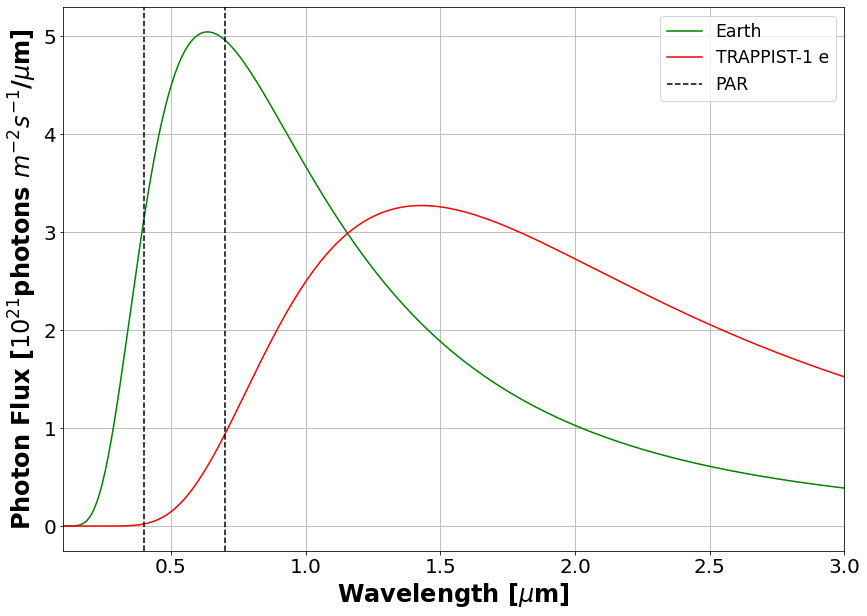

In [16]:
#photons
plt.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), color='green', label='Earth')
plt.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), color='red', label='TRAPPIST-1 e')
plt.xlabel(r'Wavelength [$\mu$m]', fontsize='24')
plt.ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', fontsize='24')
#plt.title('Instellation of Earth and TRAPPIST-1e from Blackbody Curve')
plt.xlim(0.1, 3.0) #UV starts at 1.0 micron
plt.axvline(0.4, c='black', ls='--', label='PAR')
plt.axvline(0.7, c='black', ls='--')
plt.legend(fontsize='xx-large')
plt.xticks(color='black', fontsize = 20)
plt.yticks(color='black', fontsize = 20)
plt.grid()
plt.savefig('Blackbody_PhotonFlux.png');

How to do two plots: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

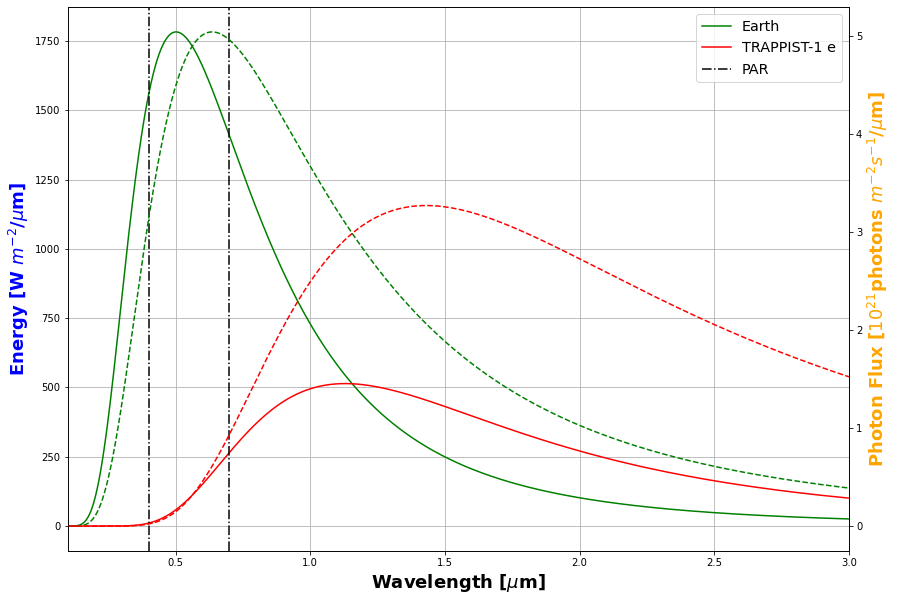

In [15]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

# your answer why the heights are different.
 **It's arbitary because the illusion is not the photon flux increases they height. It's simply how different y-axis to each other.**

Explain why the wavelength peaks shift to the right. 

The wavelength peak of the photon flux appears to shift to the right. Yet the largest change is the size and height of the fluxes for TRAPPIST-1 e from energy to photons. Both Earth and TRAPPIST-1 e also seem to be higher in height too.

Now try this with different star temperatures, notice if there's any changes with the scale difference between various stars.


However, will first see how much blackbody for energy and photons change based temperature, stellar radius, and orbital distance.

Play with TRAPPIST-1 e variables (2566 K, 0.1192 R_S, 0.02925 AU)

Increase in Temperature

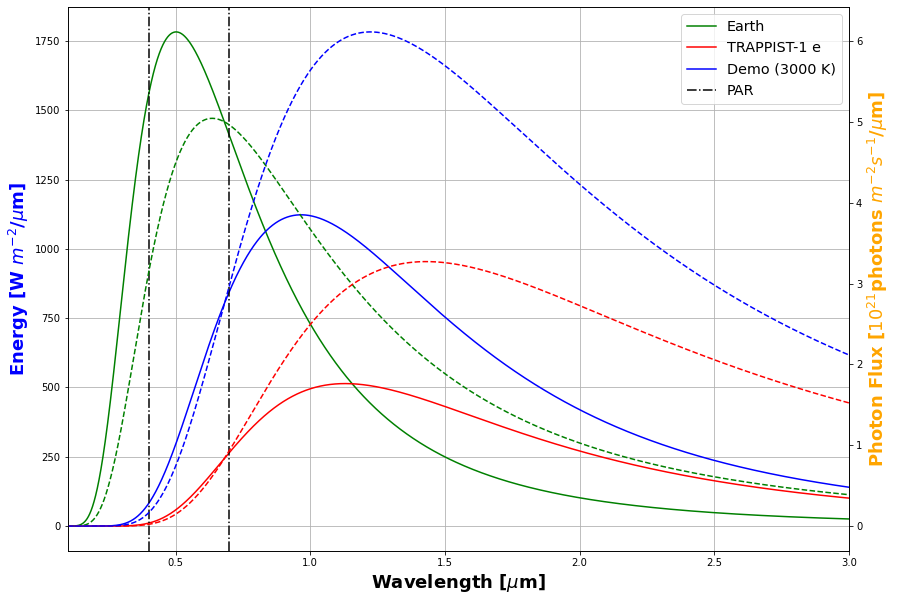

In [16]:
#energy
DemoTRD_flux_energy = blackbody_wav(wave, 3000)
#photons
DemoTRD_flux_photons = blackbody_wav_photons(wave, 3000)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoTRD_energy = 4*np.pi*((0.1192*R_sol)**2)*(DemoTRD_flux_energy[1])
DemoTRD_insol_Gill_spectra_energy = (L_DemoTRD_energy)/(4*np.pi*(((0.02925*au))**2))
L_DemoTRD_photons = 4*np.pi*((0.1192*R_sol)**2)*(DemoTRD_flux_photons[1])
DemoTRD_insol_Gill_spectra_photons = (L_DemoTRD_photons)/(4*np.pi*(((0.02925*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoTRD_insol_Gill_spectra_energy*1e-6, color='blue', label='Demo (3000 K)')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoTRD_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

<ipython-input-4-ace7a172eeb5>:4: RuntimeWarning: overflow encountered in exp
  y = x/(np.exp(s) - 1)#b is B_lambda
<ipython-input-5-275e2d451bfc>:6: RuntimeWarning: overflow encountered in exp
  y = x/(np.exp(s) - 1)#b is B_lambda


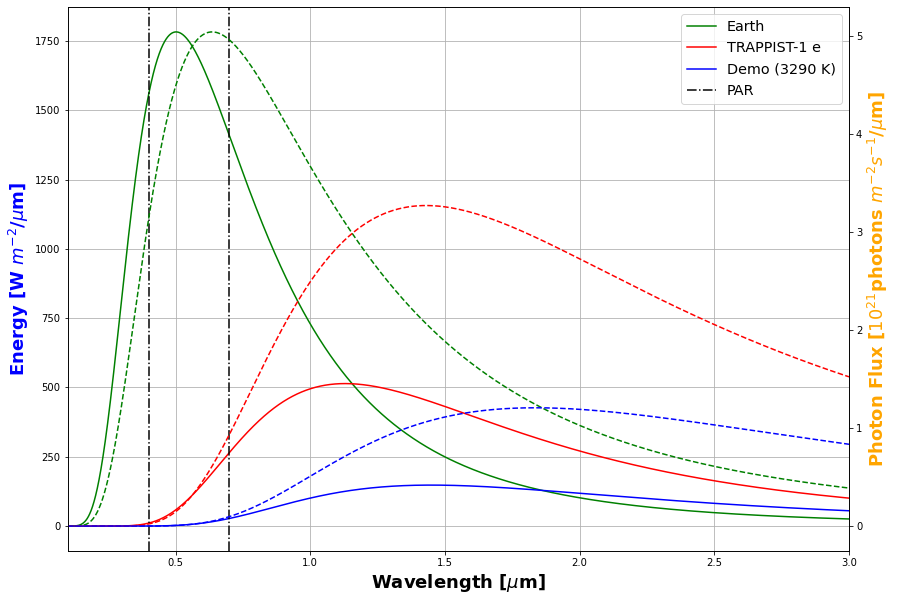

In [33]:
#energy
DemoTRD_flux_energy = blackbody_wav(wave, 2000)
#photons
DemoTRD_flux_photons = blackbody_wav_photons(wave, 2000)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoTRD_energy = 4*np.pi*((0.1192*R_sol)**2)*(DemoTRD_flux_energy[1])
DemoTRD_insol_Gill_spectra_energy = (L_DemoTRD_energy)/(4*np.pi*(((0.02925*au))**2))
L_DemoTRD_photons = 4*np.pi*((0.1192*R_sol)**2)*(DemoTRD_flux_photons[1])
DemoTRD_insol_Gill_spectra_photons = (L_DemoTRD_photons)/(4*np.pi*(((0.02925*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoTRD_insol_Gill_spectra_energy*1e-6, color='blue', label='Demo (3290 K)')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoTRD_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

In [18]:
3290/2556

1.2871674491392802

When the temperature of TRAPPIST-1 is increased by 1.287 x T_S, both heights of flux are the same between energy flux and $10^{21}$ photon flux. Except the photon flux is dramactically hiring than Earth compared to the energy flux. 

Increase in Stellar Radius

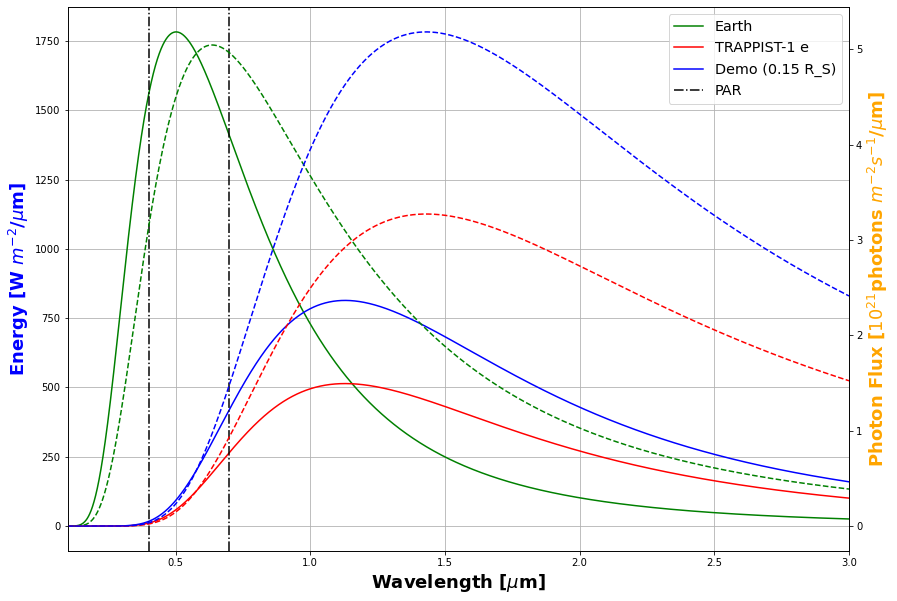

In [19]:
#energy
DemoTRD_flux_energy = blackbody_wav(wave, 2566)
#photons
DemoTRD_flux_photons = blackbody_wav_photons(wave, 2566)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoTRD_energy = 4*np.pi*((0.15*R_sol)**2)*(DemoTRD_flux_energy[1])
DemoTRD_insol_Gill_spectra_energy = (L_DemoTRD_energy)/(4*np.pi*(((0.02925*au))**2))
L_DemoTRD_photons = 4*np.pi*((0.15*R_sol)**2)*(DemoTRD_flux_photons[1])
DemoTRD_insol_Gill_spectra_photons = (L_DemoTRD_photons)/(4*np.pi*(((0.02925*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoTRD_insol_Gill_spectra_energy*1e-6, color='blue', label='Demo (0.15 R_S)')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoTRD_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

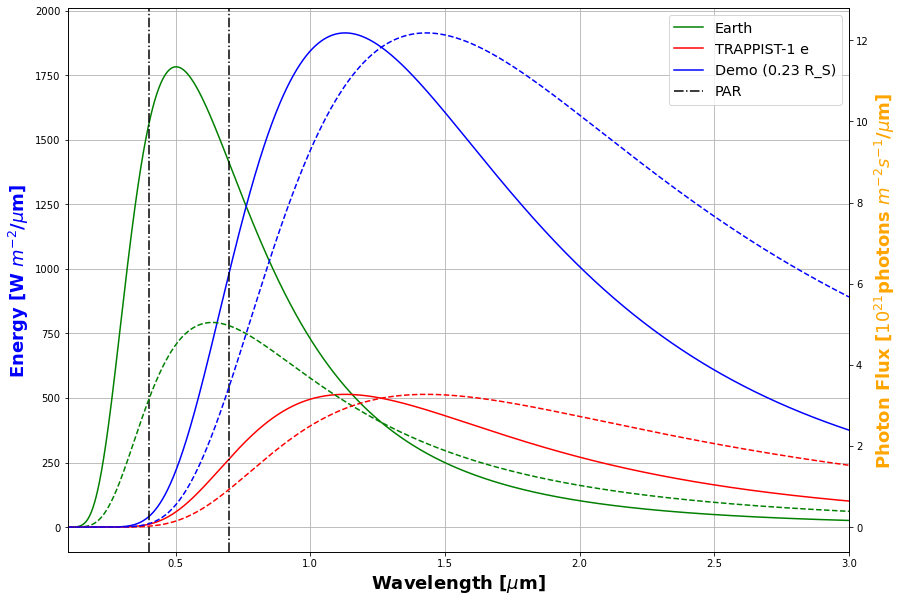

In [20]:
#energy
DemoTRD_flux_energy = blackbody_wav(wave, 2566)
#photons
DemoTRD_flux_photons = blackbody_wav_photons(wave, 2566)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoTRD_energy = 4*np.pi*((0.23*R_sol)**2)*(DemoTRD_flux_energy[1])
DemoTRD_insol_Gill_spectra_energy = (L_DemoTRD_energy)/(4*np.pi*(((0.02925*au))**2))
L_DemoTRD_photons = 4*np.pi*((0.23*R_sol)**2)*(DemoTRD_flux_photons[1])
DemoTRD_insol_Gill_spectra_photons = (L_DemoTRD_photons)/(4*np.pi*(((0.02925*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoTRD_insol_Gill_spectra_energy*1e-6, color='blue', label='Demo (0.23 R_S)')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoTRD_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

Appears that increasing the stellar radius for luminosity does seem to cause the energy to have an equal in height in relation to energy and $10^{21}$ photon flux. Once the star's radius increases to 0.23 $R_{\odot}$, with the temperature and orbital distance the same, is where the gap between the flux height begins to be equal as the Sun does with Earth. (As increase by 2x radius of TRAPPIST-1.) Except, the photon flux is dramatically higher than the Sun is to Earth. 

In [21]:
0.23/0.1192

1.929530201342282

Orbital Distance

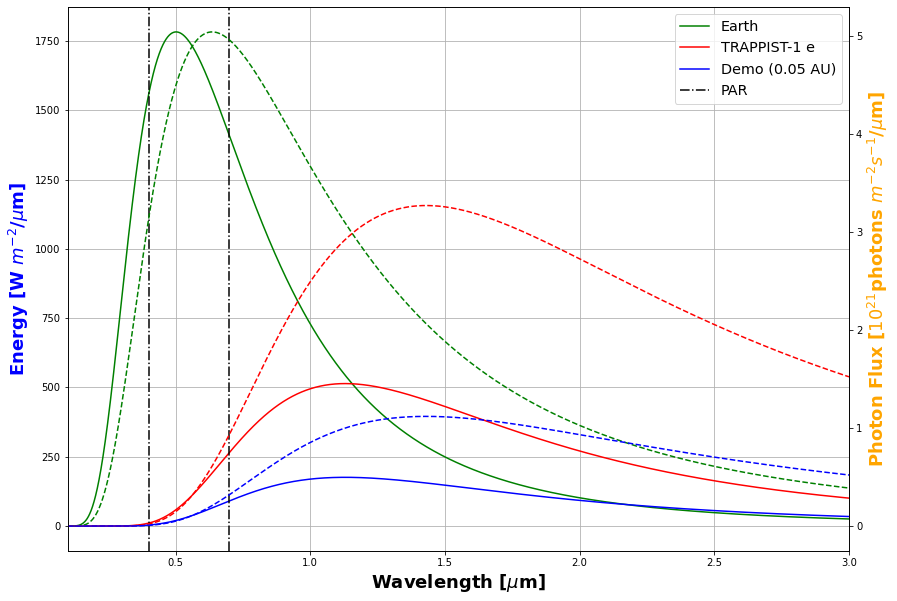

In [22]:
#energy
DemoTRD_flux_energy = blackbody_wav(wave, 2566)
#photons
DemoTRD_flux_photons = blackbody_wav_photons(wave, 2566)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoTRD_energy = 4*np.pi*((0.1192*R_sol)**2)*(DemoTRD_flux_energy[1])
DemoTRD_insol_Gill_spectra_energy = (L_DemoTRD_energy)/(4*np.pi*(((0.05*au))**2))
L_DemoTRD_photons = 4*np.pi*((0.1192*R_sol)**2)*(DemoTRD_flux_photons[1])
DemoTRD_insol_Gill_spectra_photons = (L_DemoTRD_photons)/(4*np.pi*(((0.05*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoTRD_insol_Gill_spectra_energy*1e-6, color='blue', label='Demo (0.05 AU)')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoTRD_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

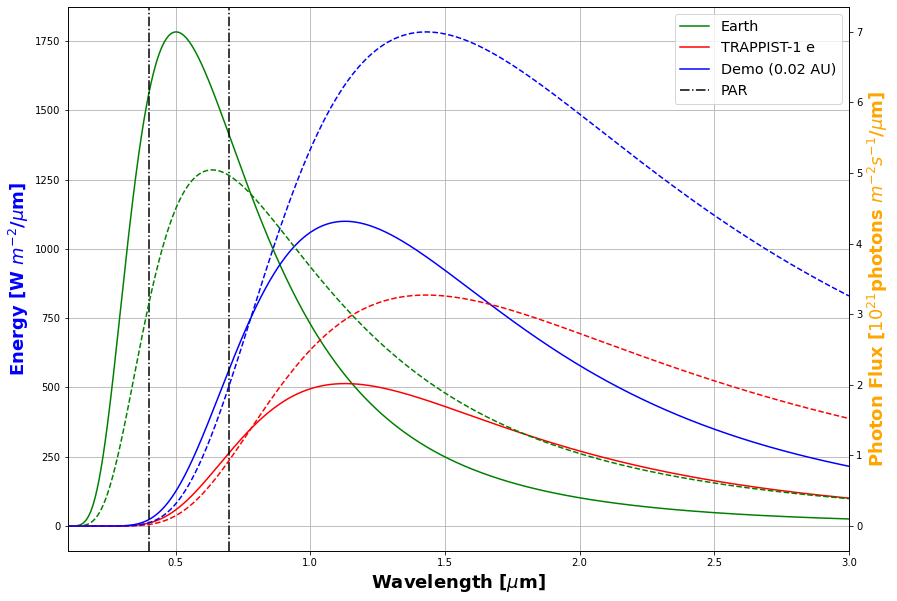

In [23]:
#energy
DemoTRD_flux_energy = blackbody_wav(wave, 2566)
#photons
DemoTRD_flux_photons = blackbody_wav_photons(wave, 2566)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoTRD_energy = 4*np.pi*((0.1192*R_sol)**2)*(DemoTRD_flux_energy[1])
DemoTRD_insol_Gill_spectra_energy = (L_DemoTRD_energy)/(4*np.pi*(((0.02*au))**2))
L_DemoTRD_photons = 4*np.pi*((0.1192*R_sol)**2)*(DemoTRD_flux_photons[1])
DemoTRD_insol_Gill_spectra_photons = (L_DemoTRD_photons)/(4*np.pi*(((0.02*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoTRD_insol_Gill_spectra_energy*1e-6, color='blue', label='Demo (0.02 AU)')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoTRD_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

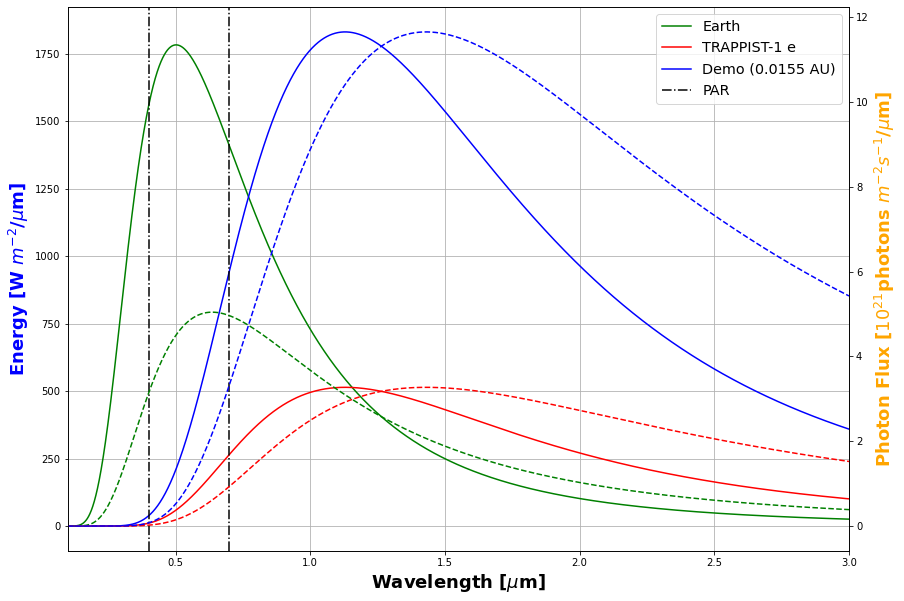

In [24]:
#energy
DemoTRD_flux_energy = blackbody_wav(wave, 2566)
#photons
DemoTRD_flux_photons = blackbody_wav_photons(wave, 2566)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoTRD_energy = 4*np.pi*((0.1192*R_sol)**2)*(DemoTRD_flux_energy[1])
DemoTRD_insol_Gill_spectra_energy = (L_DemoTRD_energy)/(4*np.pi*(((0.0155*au))**2))
L_DemoTRD_photons = 4*np.pi*((0.1192*R_sol)**2)*(DemoTRD_flux_photons[1])
DemoTRD_insol_Gill_spectra_photons = (L_DemoTRD_photons)/(4*np.pi*(((0.0155*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoTRD_insol_Gill_spectra_energy*1e-6, color='blue', label='Demo (0.0155 AU)')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoTRD_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

In [25]:
0.0155/0.02925

0.5299145299145299

Appears that by decreasing the orbital distance by 53% for the stellar insolation does seem to cause the energy to have an equal in height in relation to energy and $10^{21}$ photon flux, with the temperature and stellar radius the same. An increase in height overall is expected as the planet gets closer to the star. However, the difference in photon flux is far larger in size to Earth than it is in the energy flux.

Play with Earth/Sun variables (5772 K, 1.0 R_S, 1.0 AU)

<ipython-input-4-ace7a172eeb5>:4: RuntimeWarning: overflow encountered in exp
  y = x/(np.exp(s) - 1)#b is B_lambda
<ipython-input-5-275e2d451bfc>:6: RuntimeWarning: overflow encountered in exp
  y = x/(np.exp(s) - 1)#b is B_lambda


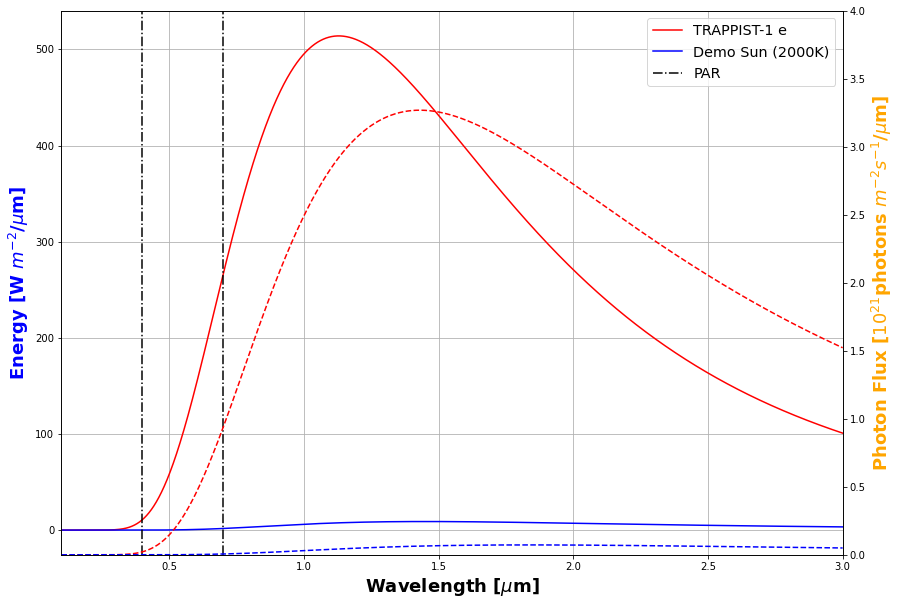

In [36]:
#energy
DemoTRD_flux_energy = blackbody_wav(wave, 2000)
#photons
DemoTRD_flux_photons = blackbody_wav_photons(wave, 2000)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoTRD_energy = 4*np.pi*((1.0*R_sol)**2)*(DemoTRD_flux_energy[1])
DemoTRD_insol_Gill_spectra_energy = (L_DemoTRD_energy)/(4*np.pi*(((1.0*au))**2))
L_DemoTRD_photons = 4*np.pi*((1.0*R_sol)**2)*(DemoTRD_flux_photons[1])
DemoTRD_insol_Gill_spectra_photons = (L_DemoTRD_photons)/(4*np.pi*(((1.0*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
#ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoTRD_insol_Gill_spectra_energy*1e-6, color='blue', label='Demo Sun (2000K)')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         #color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoTRD_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
ax2.set_ylim(0, 4)
#plt.legend(fontsize='x-large')
plt.show();

# your answer why the heights are different.
 **It's arbitary because the illusion is not the photon flux increases they height. It's simply how different y-axis to each other.**

NOTES:
* It appears when you decrease the sun's temperature, the photon flux begins to appear higher than the energy flux. However, when you increase the Sun's temperature in the demo, now the the photon flux of the Sun appears to be higher than it's normal energy flux. It could be more of a chose of the scales between the energy flux and photon flux on the same graph.
* Try playing with the radius and orbital distance to see if both the demo and original solar insolation of Earth changes in appearance. 

For my experiment, I will try three stars that have confirmed planets within their HZ. 
* Kepler-62e, K2V, 5062 K, 	0.660 R_sun, 0.427 AU (Borucki et al. 2019)https://doi.org/10.1016%2Fj.newar.2019.03.002
* Kepler-442b, K5V, 4402 K, 0.60 R_sun, 0.409 AU (Torres et al. 2015) https://doi.org/10.1088%2F0004-637X%2F800%2F2%2F99
* Kepler-296e, K7V, 3440 K, 0.322 R_sun, 0.174 AU (Barclay et al. 2015) https://doi.org/10.1088%2F0004-637X%2F809%2F1%2F7
* Kepler-296f, K7V, 3440 K, 0.322 R_sun, 0.263 AU (Barclay et al. 2015) https://doi.org/10.1088%2F0004-637X%2F809%2F1%2F7
* Gliese 667 Cc, M1V, 3443 K, 0.337 R_sun, 0.1251 AU (Pineda et al. 2021) https://doi.org/10.3847%2F1538-4357%2Fac0aea
* Kepler-1649, M5V, 3240 K, 0.2317 R_sun, 0.0649 AU (NASA Exoplanet Archive) https://exoplanetarchive.ipac.caltech.edu/cgi-bin/DisplayOverview/nph-DisplayOverview?objname=Kepler-1649

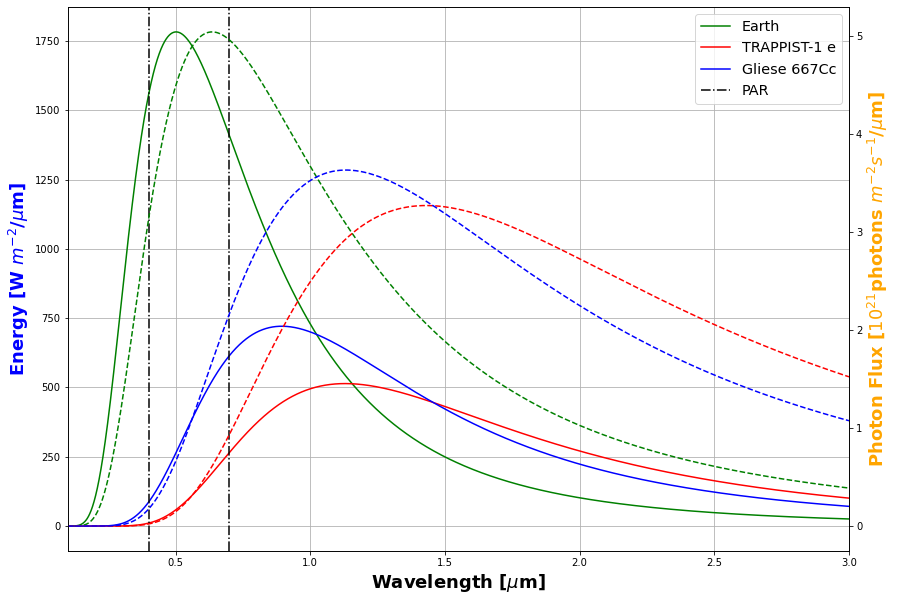

In [27]:
#energy
DemoE_flux_energy = blackbody_wav(wave, 3240)
#photons
DemoE_flux_photons = blackbody_wav_photons(wave, 3240)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoE_energy = 4*np.pi*((0.337*R_sol)**2)*(DemoE_flux_energy[1])
DemoE_insol_Gill_spectra_energy = (L_DemoE_energy)/(4*np.pi*(((0.1251*au))**2))
L_DemoE_photons = 4*np.pi*((0.337*R_sol)**2)*(DemoE_flux_photons[1])
DemoE_insol_Gill_spectra_photons = (L_DemoE_photons)/(4*np.pi*(((0.1251*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoE_insol_Gill_spectra_energy*1e-6, color='blue', label='Gliese 667Cc')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoE_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

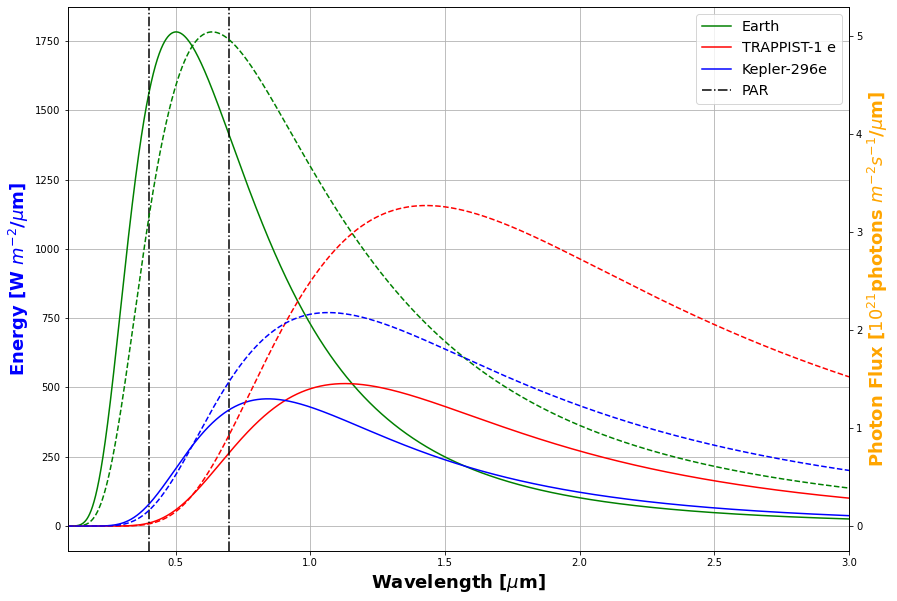

In [28]:
#energy
DemoE_flux_energy = blackbody_wav(wave, 3440)
#photons
DemoE_flux_photons = blackbody_wav_photons(wave, 3440)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoE_energy = 4*np.pi*((0.322*R_sol)**2)*(DemoE_flux_energy[1])
DemoE_insol_Gill_spectra_energy = (L_DemoE_energy)/(4*np.pi*(((0.174*au))**2))
L_DemoE_photons = 4*np.pi*((0.322*R_sol)**2)*(DemoE_flux_photons[1])
DemoE_insol_Gill_spectra_photons = (L_DemoE_photons)/(4*np.pi*(((0.174*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoE_insol_Gill_spectra_energy*1e-6, color='blue', label='Kepler-296e')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoE_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

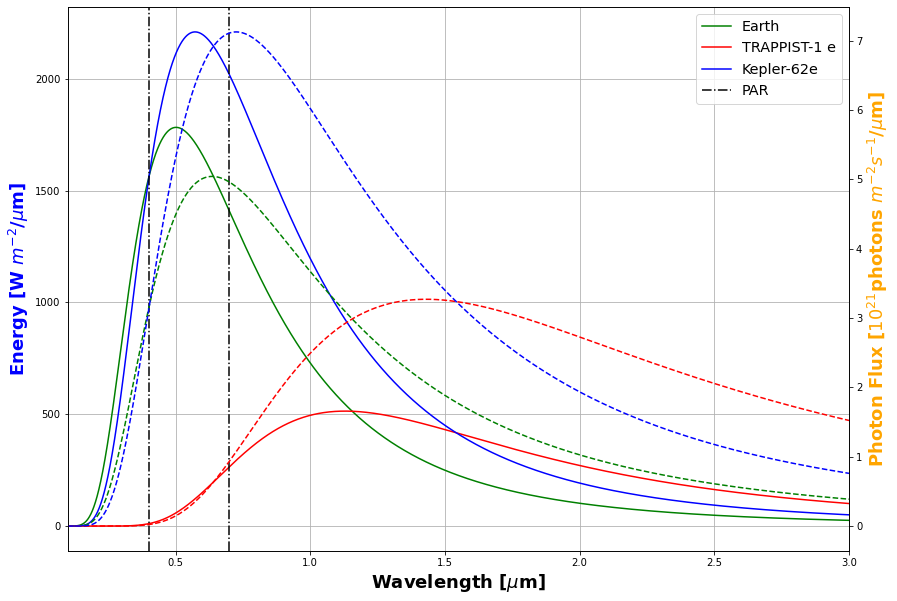

In [29]:
#energy
DemoE_flux_energy = blackbody_wav(wave, 5062)
#photons
DemoE_flux_photons = blackbody_wav_photons(wave, 5062)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoE_energy = 4*np.pi*((0.660*R_sol)**2)*(DemoE_flux_energy[1])
DemoE_insol_Gill_spectra_energy = (L_DemoE_energy)/(4*np.pi*(((0.427*au))**2))
L_DemoE_photons = 4*np.pi*((0.660*R_sol)**2)*(DemoE_flux_photons[1])
DemoE_insol_Gill_spectra_photons = (L_DemoE_photons)/(4*np.pi*(((0.427*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoE_insol_Gill_spectra_energy*1e-6, color='blue', label='Kepler-62e')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoE_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

* Kepler-442b, K5V, 4402 K, 0.60 R_sun, 0.409 AU (Torres et al. 2015) https://doi.org/10.1088%2F0004-637X%2F800%2F2%2F99

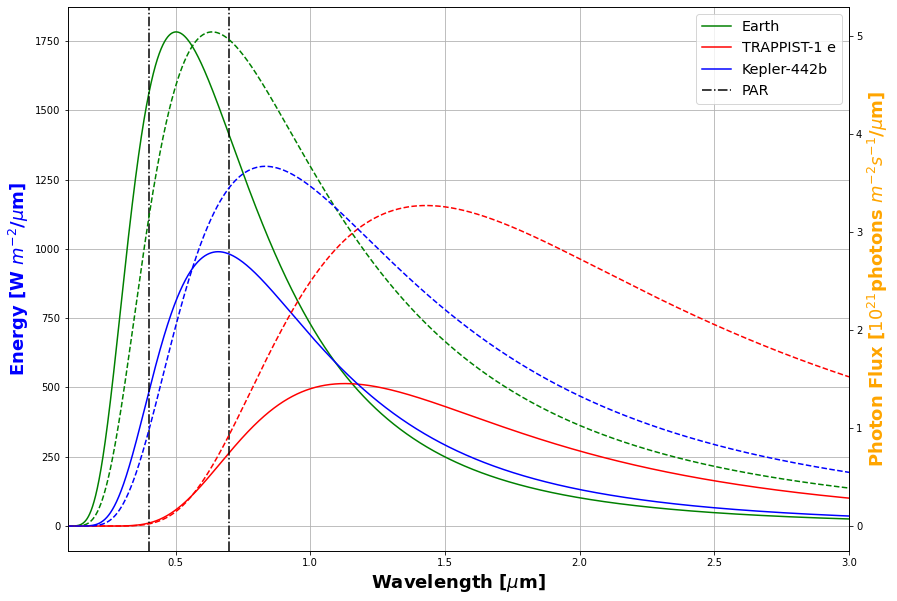

In [30]:
#energy
DemoE_flux_energy = blackbody_wav(wave, 4402)
#photons
DemoE_flux_photons = blackbody_wav_photons(wave, 4402)
#Insolation in energy
#R_K62 = 0.66*R_sol
L_DemoE_energy = 4*np.pi*((0.60*R_sol)**2)*(DemoE_flux_energy[1])
DemoE_insol_Gill_spectra_energy = (L_DemoE_energy)/(4*np.pi*(((0.409*au))**2))
L_DemoE_photons = 4*np.pi*((0.60*R_sol)**2)*(DemoE_flux_photons[1])
DemoE_insol_Gill_spectra_photons = (L_DemoE_photons)/(4*np.pi*(((0.409*au))**2))
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Sol_flux_energy[0]/1e-6, Earth_insol_Gill_spectra_energy*1e-6, color='green', label='Earth')
ax.plot(TRAP1_flux_energy[0]/1e-6, TRAP1_e_insol_Gill_spectra_energy*1e-6, color='red', label='TRAPPIST-1 e')
ax.plot(DemoTRD_flux_energy[0]/1e-6, DemoE_insol_Gill_spectra_energy*1e-6, color='blue', label='Kepler-442b')
# set x-axis label
ax.set_xlabel(r'Wavelength [$\mu$m]')
# set y-axis label
ax.set_ylabel(r'Energy [W $m^{-2}$/$\mu$m]', color='Blue')
ax.set_xlim(0.1, 3.0) #UV starts at 1.0 micron
ax.axvline(0.4, c='black', ls='dashdot', label='PAR')
ax.axvline(0.7, c='black', ls='dashdot')
ax.legend(fontsize='x-large')
#ax.set_xticks(fontsize = 15)
#ax.set_yticks(fontsize = 15)
ax.grid()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Sol_flux_photons[0]/1e-6, (Earth_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='green', ls='--', label='Earth (photons)')
ax2.plot(TRAP1_flux_photons[0]/1e-6, (TRAP1_e_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='red', ls='--', label='TRAPPIST-1 e (photons)')
ax2.plot(DemoTRD_flux_photons[0]/1e-6, (DemoE_insol_Gill_spectra_photons*1e-6)/(1e21), 
         color='blue', ls='--', label='Demo (photons)')
ax2.set_ylabel(r'Photon Flux [$10^{21}$photons $m^{-2} s^{-1}$/$\mu$m]', color='Orange')
#plt.legend(fontsize='x-large')
plt.show();

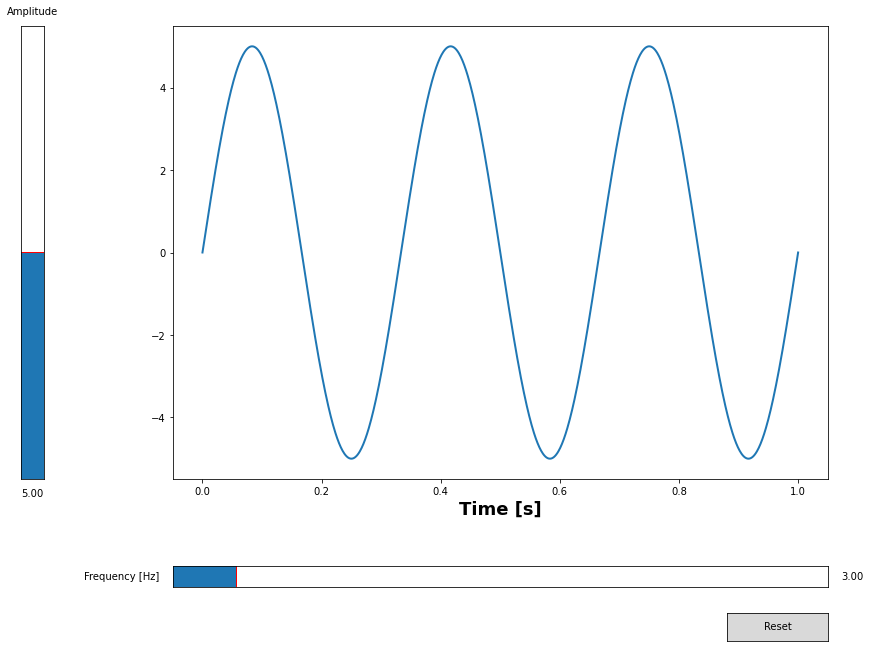

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()